In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
import os
src_path='../src'
if not src_path in sys.path:
    sys.path.insert(1,src_path)
from preposessing import *
import matplotlib
from utils_OB import *
from _tracking import *
%load_ext autoreload
import pickle
%autoreload 2
from utils_JK import *
from _postprocessing import *

Could not import mat 73. Intall width "pip install mat73" if class "import_file" is to be used.


In [2]:
folder_path='../../../5hz_resampled_int_trans_clustered_3/'
omegas,phis,names=import_folder_for_tracking(folder_path)
freqs=radtoHz(omegas)

In [3]:
traces=perform_tracking_magalhaes2008(freqs,phis,MAC_threshold=0.85,df_threshold=0.05)


In [4]:
phys_traces_ix=np.where([i.isphysical for i in traces])[0]
# print(type(traces))
phys_traces=[]
for ix in phys_traces_ix:
    phys_traces.append(traces[ix])



for i,trace in enumerate(phys_traces):
    Post_obj=Postprocessor()
    Post_obj.assign_trace(phys_traces[i],names)
    # print('Assigned ',+i)
    # Post_obj.import_temp_fromUllensvang('../../../../data/Temperaturdata 2 stasjoner.csv')
    # print('    Ullensvang temp imported')
    # Post_obj.import_weather(folder_path)
    # print('    Weather imported')
    # Post_obj.get_damping_from_trace(folder_path)
    # print('    Damping imported')
    
    #saving:
    path='../../../Tracking/MAG_Mt85_df0.05_2/'
    mean_freq=round(np.mean(Post_obj.trace.frequencies),3)
    tot_path=path+'trace_'+str(mean_freq)+'.pkl'
    with open(tot_path, 'wb') as fout:
        pickle.dump(Post_obj,fout)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


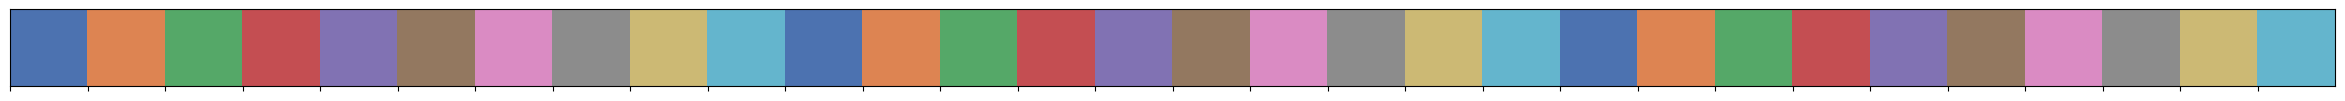

In [8]:
import seaborn as sns
custom_palette = sns.color_palette('deep', 30)
sns.palplot(custom_palette)